<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/dequantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [252]:
def rescale(x, lo, hi):
    """Rescale a tensor to [lo,hi]."""
    assert(lo < hi), "[rescale] lo={0} must be smaller than hi={1}".format(lo,hi)
    old_width = torch.max(x)-torch.min(x)
    old_center = torch.min(x) + (old_width / 2.)
    new_width = float(hi-lo)
    new_center = lo + (new_width / 2.)
    # shift everything back to zero:
    x = x - old_center
    # rescale to correct width:
    x = x * (new_width / old_width)
    # shift everything to the new center:
    x = x + new_center
    # return:
    return x

In [253]:
"""x = torch.tensor([[10, 10], [10, 15],
                  [15, 10], [15, 15]]).to(torch.float32)

y = torch.tensor([[5, 5], [5, 10],
                  [10, 5], [10, 10]]).to(torch.float32)

a = torch.concat((x,y),0)

uniform = torch.distributions.uniform.Uniform(torch.tensor([-0.5]), torch.tensor([0.5]))
u_sample = uniform.sample((4,2)).reshape((4,2))
"""
"""x = x.div(15.) + u_sample
x = rescale(x, 0, 1)
x"""

'x = x.div(15.) + u_sample\nx = rescale(x, 0, 1)\nx'

In [254]:
x = torch.tensor([[1, 1], [1, 2],
                  [2, 1], [2, 2]]).to(torch.float32)

z = torch.tensor([[1, 3], [1, 4],
                  [2, 3], [2, 4]]).to(torch.float32)

t = torch.tensor([[3, 1], [3, 2],
                  [4, 1], [4, 2]]).to(torch.float32)

y = torch.tensor([[3, 3], [3, 4],
                  [4, 3], [4, 4]]).to(torch.float32)

a = torch.concat((x,z,t,y),0)

uniform = torch.distributions.uniform.Uniform(torch.tensor([-0.5]), torch.tensor([0.5]))
u_sample = uniform.sample((4,2)).reshape((4,2))


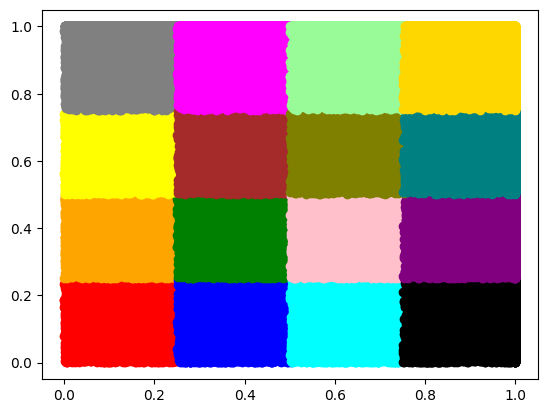

'Y = torch.zeros((4000,2))\n\nfor i in range(1000):\n  Y[i*4:(i+1)*4,:] = (y + uniform.sample((4,2)).reshape((4,2))).div(15.)\n\nY = rescale(Y, 0, 1)\nplt.scatter(Y[::4, 0], Y[::4, 1])\nplt.scatter(Y[1::4, 0], Y[1::4, 1])\nplt.scatter(Y[2::4, 0], Y[2::4, 1])\nplt.scatter(Y[3::4, 0], Y[3::4, 1])'

In [269]:
X = torch.zeros((160000,2))

for i in range(10000):
  b = a + uniform.sample((16,2)).squeeze()
  b = b / b.max()
  X[i*16:(i+1)*16,:] = b

X = rescale(X, 0, 1)


plt.scatter(X[::16, 0], X[::16, 1], color='red')
plt.scatter(X[1::16, 0], X[1::16, 1], color='orange')
plt.scatter(X[2::16, 0], X[2::16, 1], color='blue')
plt.scatter(X[3::16, 0], X[3::16, 1], color='green')

plt.scatter(X[4::16, 0], X[4::16, 1], color='yellow')
plt.scatter(X[5::16, 0], X[5::16, 1], color='grey')
plt.scatter(X[6::16, 0], X[6::16, 1], color='brown')
plt.scatter(X[7::16, 0], X[7::16, 1], color='magenta')

plt.scatter(X[8::16, 0], X[8::16, 1], color='cyan')
plt.scatter(X[9::16, 0], X[9::16, 1], color='pink')
plt.scatter(X[10::16, 0], X[10::16, 1], color='black')
plt.scatter(X[11::16, 0], X[11::16, 1], color='purple')

plt.scatter(X[12::16, 0], X[12::16, 1], color='olive')
plt.scatter(X[13::16, 0], X[13::16, 1], color='palegreen')
plt.scatter(X[14::16, 0], X[14::16, 1], color='teal')
plt.scatter(X[15::16, 0], X[15::16, 1], color='gold')

plt.show()
"""Y = torch.zeros((4000,2))

for i in range(1000):
  Y[i*4:(i+1)*4,:] = (y + uniform.sample((4,2)).reshape((4,2))).div(15.)

Y = rescale(Y, 0, 1)
plt.scatter(Y[::4, 0], Y[::4, 1])
plt.scatter(Y[1::4, 0], Y[1::4, 1])
plt.scatter(Y[2::4, 0], Y[2::4, 1])
plt.scatter(Y[3::4, 0], Y[3::4, 1])"""

In [256]:
torch.concat((x,x),0)[::4,:]

tensor([[1., 1.],
        [1., 1.]])

In [257]:
torch.tensor(x).div_(256.) + torch.rand_like(torch.tensor(x))

<ipython-input-257-abb3ec2367be>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x).div_(256.) + torch.rand_like(torch.tensor(x))


tensor([[0.9326, 0.0988],
        [0.6083, 0.2297],
        [0.2039, 0.0497],
        [0.2388, 0.6370]])